In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
data = pd.read_csv('/content/drive/MyDrive/House Sale Data/Preprocessed.csv')

In [89]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


#**Feature Engineering**
It is of 2 types : a) Feature preprocessing: changing,Updating or transforming the existing features.


 b) Feature Generation:
 Generating new features from the existing features.
# a) Feature Preprocessing:
### Feature Transformation : Method used to transformfeatures using mathematical operations and is model specific

 # Performing Feature Engineering on continuous variables

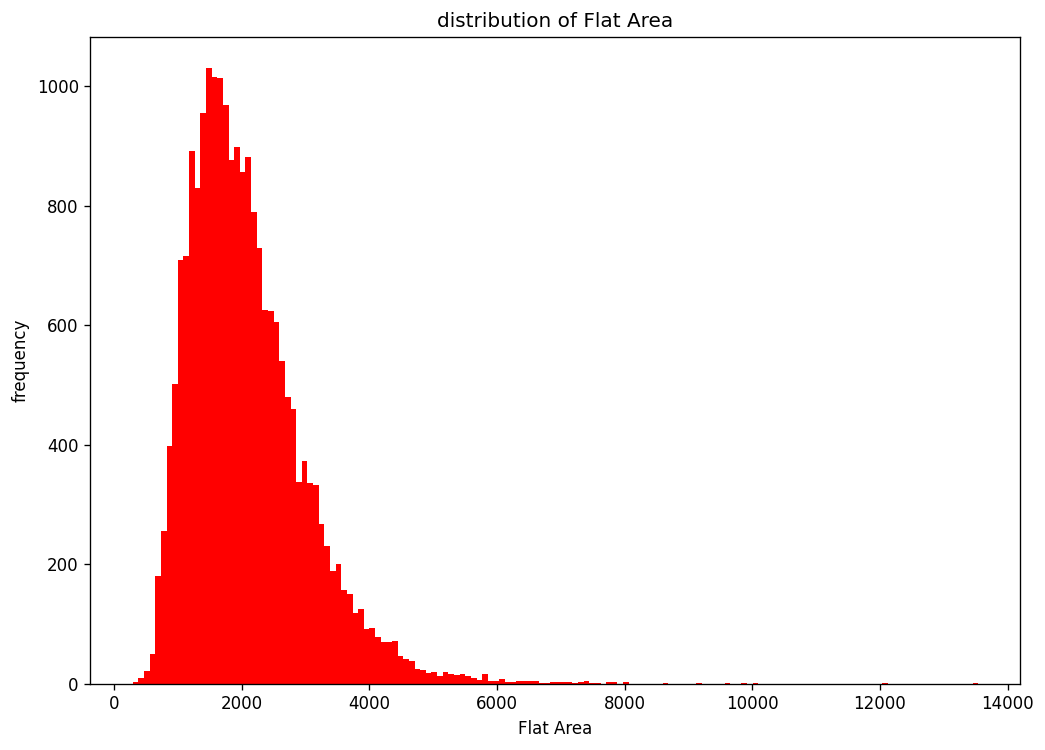

In [90]:
# Best and easiest way to check distribution of any variable is to plot histogram
plt.figure(figsize =(10,7), dpi=120)
plt.hist(data["Flat Area (in Sqft)"], bins=150, color='red')
plt.xlabel('Flat Area')
plt.ylabel('frequency')
plt.title('distribution of Flat Area')
plt.show()

# As the above data is right skewed we will use log transformation (nth root or log(x) )to make it normally distributed

In [91]:
def log_transform(sample_data):
  return np.log(sample_data)

In [92]:
data['Transformed Flat Area']= data['Flat Area (in Sqft)'].map(log_transform)

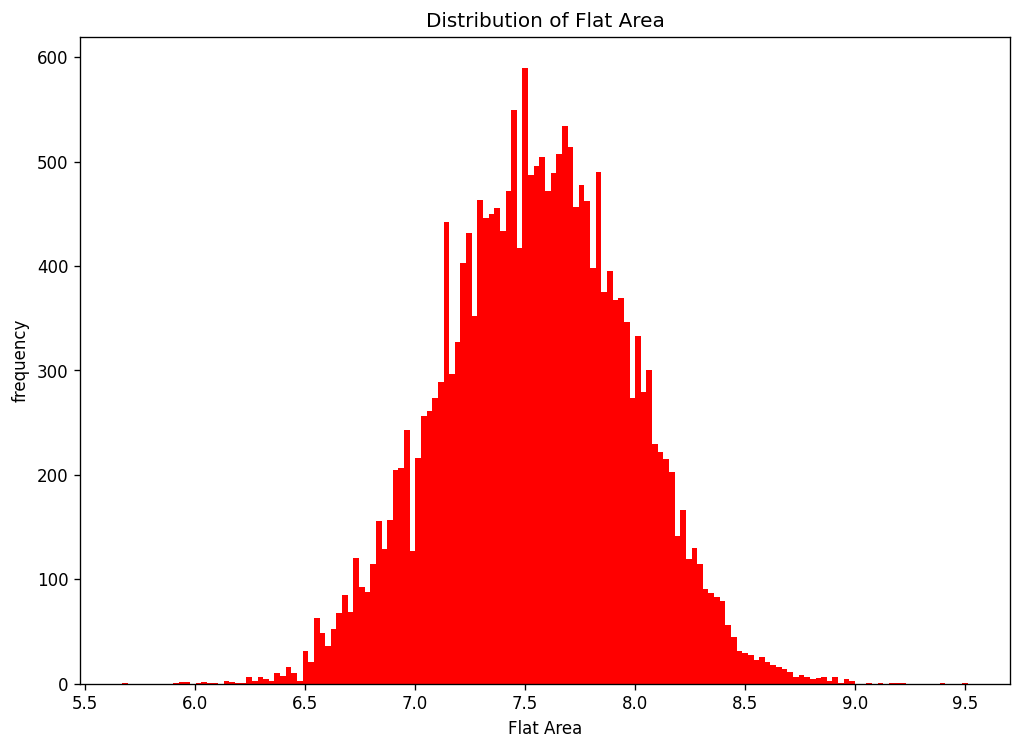

In [93]:
plt.figure(figsize=(10,7), dpi=120)
plt.hist(data['Transformed Flat Area'], bins=150, color='red')
plt.xlabel('Flat Area')
plt.ylabel('frequency')
plt.title("Distribution of Flat Area")
plt.show()

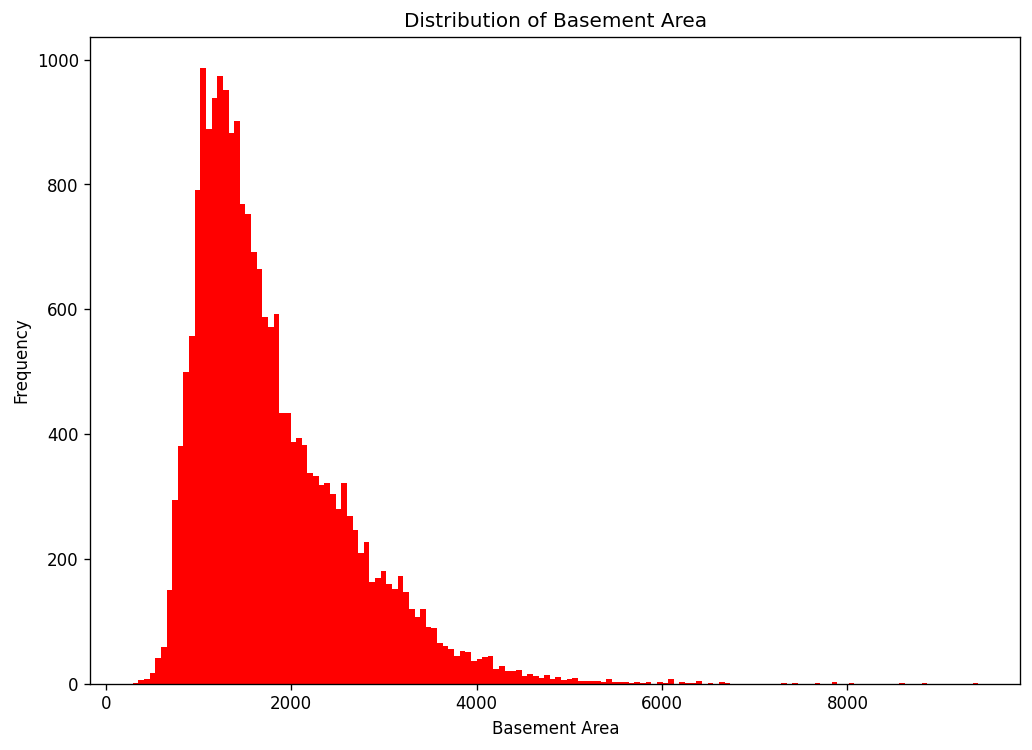

In [94]:
plt.figure(figsize =(10,7), dpi=120)
plt.hist(data["Area of the House from Basement (in Sqft)"], bins=150, color='red')
plt.xlabel('Basement Area')
plt.ylabel('Frequency')
plt.title('Distribution of Basement Area')
plt.show()

In [95]:
data['Transformed Basement Area']= data['Area of the House from Basement (in Sqft)'].map(log_transform)

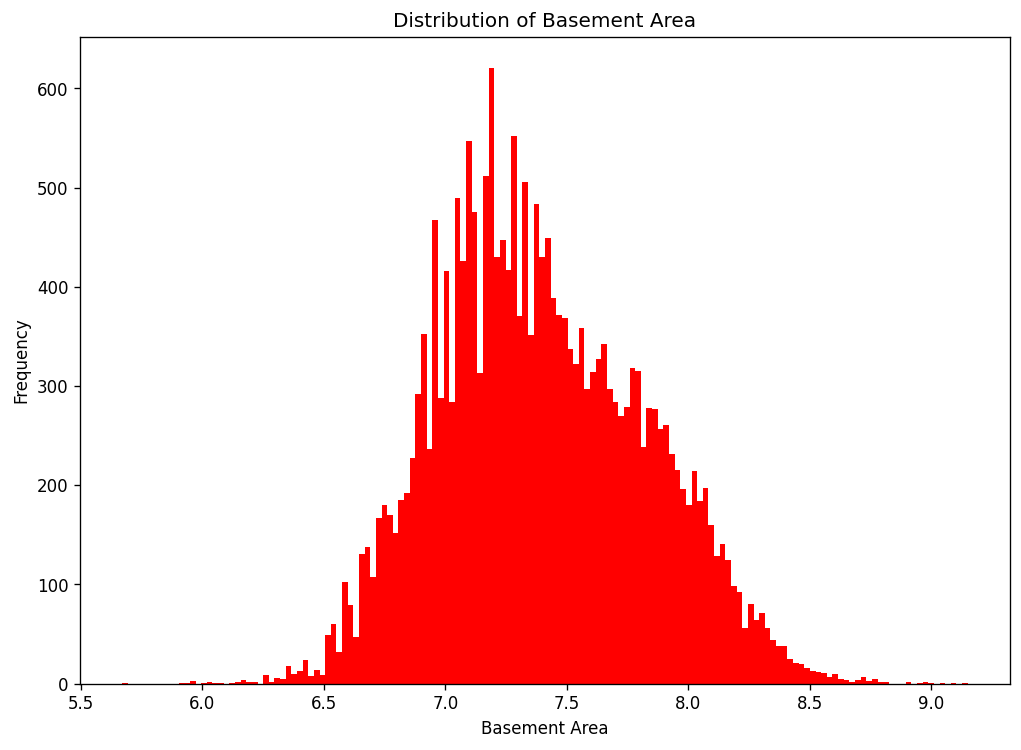

In [96]:
plt.figure(figsize=(10,7), dpi=120)
plt.hist(data['Transformed Basement Area'], bins=150, color='red')
plt.xlabel('Basement Area')
plt.ylabel('Frequency')
plt.title("Distribution of Basement Area")
plt.show()

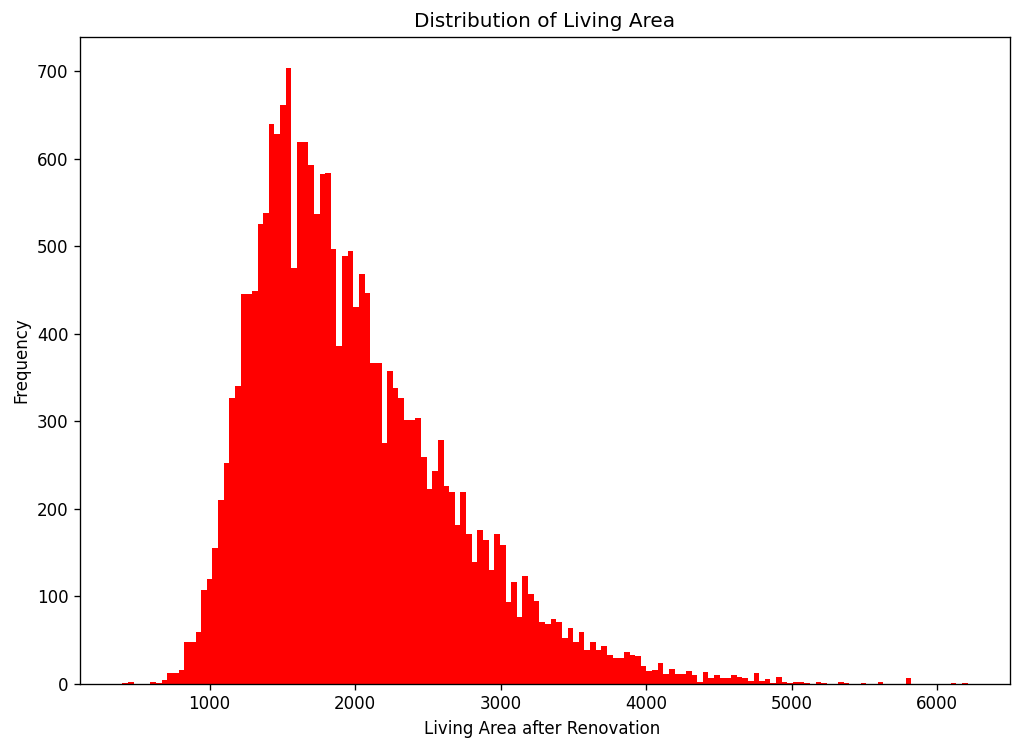

In [97]:
plt.figure(figsize =(10,7), dpi=120)
plt.hist(data["Living Area after Renovation (in Sqft)"], bins=150, color='red')
plt.xlabel('Living Area after Renovation ')
plt.ylabel('Frequency')
plt.title('Distribution of Living Area')
plt.show()

In [98]:
data['Transformed Living Area']= data['Living Area after Renovation (in Sqft)'].map(log_transform)


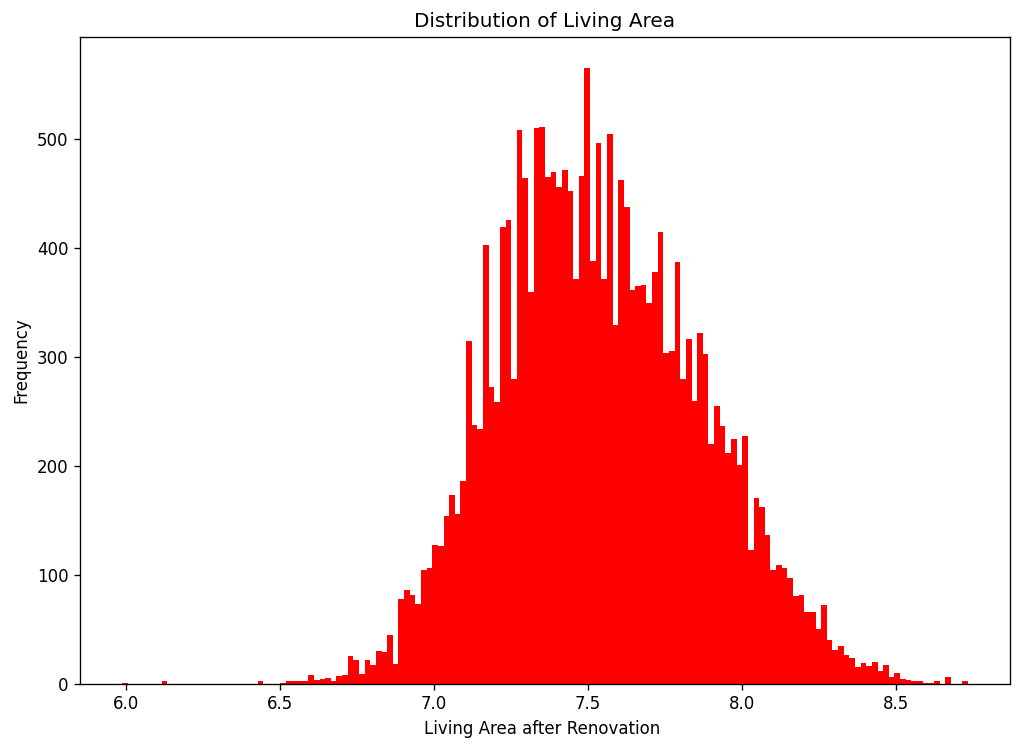

In [99]:
plt.figure(figsize =(10,7), dpi=120)
plt.hist(data["Transformed Living Area"], bins=150, color='red')
plt.xlabel('Living Area after Renovation ')
plt.ylabel('Frequency')
plt.title('Distribution of Living Area')
plt.show()

In [100]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale_Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   No of Times Visited                        21609 non-null  int64  
 7   Overall Grade                              21609 non-null  int64  
 8   Area of the House from Basement (in Sqft)  21609 non-null  float64
 9   Basement Area (in Sqft)                    21609 non-null  int64  
 10  Age of House (in Years

#**Binning**

It is the process of aggregating data points in different categories to reduce the redundancy and can be implemented on both numerical and categorical columns

**Advantages:**


1) Reducing the redundancy of the independent variables.

2) Carrying out One-Hot_Encoding or creating the dummy variables.

# Performing Binning of Continuos Variable : Age of the House

In [101]:
len(data['Age of House (in Years)'].unique())

116

In [102]:
data['Age of House (in Years)'].max()

118

In [103]:
data['Age of House (in Years)'].min()

3

In [104]:
def age_of_house(x):
  if x<10:
    x ='new'
  elif x < 50:
    x = 'old'
  else:
    x = 'very old'
  return x

In [105]:
House_age = data['Age of House (in Years)'].map(age_of_house)
House_age.unique()

array(['very old', 'old', 'new'], dtype=object)

In [106]:
binned_data = pd.get_dummies(House_age, prefix='House_age').astype(int)

In [107]:
binned_data

,House_age_new,House_age_old,House_age_very old
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
21604,1,0,0
21605,1,0,0
21606,1,0,0
21607,0,1,0


In [108]:
# Concatenate the binned data with our original preprocessed dataset
data = pd.concat([data,binned_data], axis =1)

In [109]:
# Drop the original 'Age of House (in Years)' column
data = data.drop('Age of House (in Years)', axis=1)

In [110]:
data = data.drop(
    columns=[
        'Flat Area (in Sqft)',
        'Basement Area (in Sqft)',
        'Living Area after Renovation (in Sqft)'
    ]
)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 33 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale_Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Lot Area (in Sqft)                         21609 non-null  float64
 4   No of Floors                               21609 non-null  float64
 5   No of Times Visited                        21609 non-null  int64  
 6   Overall Grade                              21609 non-null  int64  
 7   Area of the House from Basement (in Sqft)  21609 non-null  float64
 8   Latitude                                   21609 non-null  float64
 9   Longitude                                  21609 non-null  float64
 10  Lot Area after Renovat

In [112]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Latitude,Longitude,...,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9,Transformed Flat Area,Transformed Basement Area,Transformed Living Area,House_age_new,House_age_old,House_age_very old
0,221900.0,3,1.00,5650.0,1.0,0,7,1180.0,47.5112,-122.257,...,0,0,0,0,7.073270,7.073270,7.200425,0,0,1
1,538000.0,3,2.25,7242.0,2.0,0,7,2170.0,47.7210,-122.319,...,0,0,0,0,7.851661,7.682482,7.432484,0,0,1
2,180000.0,2,1.00,10000.0,1.0,0,6,770.0,47.7379,-122.233,...,0,0,0,0,6.646391,6.646391,7.908387,0,0,1
3,604000.0,4,3.00,5000.0,1.0,0,7,1050.0,47.5208,-122.393,...,0,0,0,0,7.580700,6.956545,7.215240,0,0,1
4,510000.0,3,2.00,8080.0,1.0,0,8,1680.0,47.6168,-122.045,...,0,0,0,0,7.426549,7.426549,7.495542,0,1,0


#**Feature Generation**

**Feature Extraction :** The process of extracting information from the original features such that the extracted features contains the information in simpler form and can be used to increase the model performance.

  **Implementation in our Dataset**:
Years Since Rennavation (I have completeed this in my Data Exploration and Preprocessing Notebook)

In [113]:
def luxury_home(row):
    count = 0
    if row['Waterfront_View_Yes'] == 'Yes':
        count += 1
    if row['Condition_of_the_House_Excellent'] == 1 or row['Condition_of_the_House_Good'] == 1:
        count += 1
    if row['Overall Grade'] >= 8:
        count += 1
    if count >= 2:
        return 'Yes'
    else:
        return 'No'

# Applying the function to the dataset
data['luxury_home'] = data.apply(luxury_home, axis=1)


In [116]:
# Convert 'Yes' to 1 and 'No' to 0
data['luxury_home'] = data['luxury_home'].map({'Yes': 1, 'No': 0})

In [121]:
luxury = data.pivot_table(values='Sale_Price', columns ='luxury_home', aggfunc='mean')

In [122]:
luxury

luxury_home,0,1
Sale_Price,483736.944462,711178.918837


Text(0, 0.5, 'Mean Sale Price')

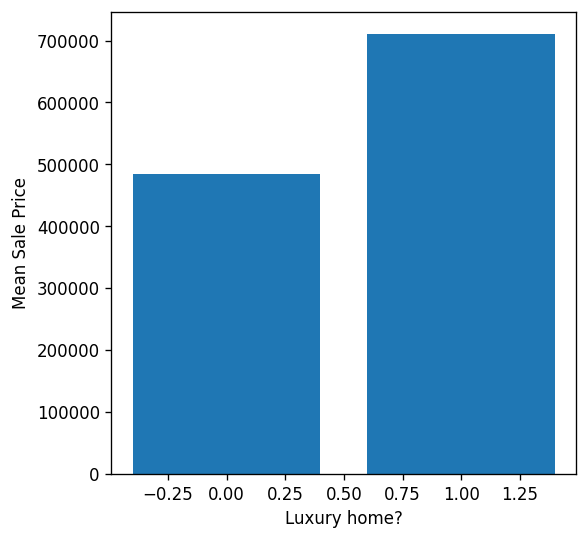

In [124]:
plt.figure(figsize= (5,5), dpi=120)
plt.bar(luxury.columns,luxury.iloc[0])
plt.xlabel('Luxury home?')
plt.ylabel("Mean Sale Price")

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale_Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Lot Area (in Sqft)                         21609 non-null  float64
 4   No of Floors                               21609 non-null  float64
 5   No of Times Visited                        21609 non-null  int64  
 6   Overall Grade                              21609 non-null  int64  
 7   Area of the House from Basement (in Sqft)  21609 non-null  float64
 8   Latitude                                   21609 non-null  float64
 9   Longitude                                  21609 non-null  float64
 10  Lot Area after Renovat

In [118]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Latitude,Longitude,...,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9,Transformed Flat Area,Transformed Basement Area,Transformed Living Area,House_age_new,House_age_old,House_age_very old,luxury_home
0,221900.0,3,1.00,5650.0,1.0,0,7,1180.0,47.5112,-122.257,...,0,0,0,7.073270,7.073270,7.200425,0,0,1,0
1,538000.0,3,2.25,7242.0,2.0,0,7,2170.0,47.7210,-122.319,...,0,0,0,7.851661,7.682482,7.432484,0,0,1,0
2,180000.0,2,1.00,10000.0,1.0,0,6,770.0,47.7379,-122.233,...,0,0,0,6.646391,6.646391,7.908387,0,0,1,0
3,604000.0,4,3.00,5000.0,1.0,0,7,1050.0,47.5208,-122.393,...,0,0,0,7.580700,6.956545,7.215240,0,0,1,0
4,510000.0,3,2.00,8080.0,1.0,0,8,1680.0,47.6168,-122.045,...,0,0,0,7.426549,7.426549,7.495542,0,1,0,0


#**Saving My resultant data as csv to My Drive**

In [119]:
# Define the file path where you want to save the dataset
save_path = '/content/drive/MyDrive/Processed_Housing_Data.csv'

# Save the dataset
data.to_csv(save_path, index=False)